# DataMining - TEAM1

# ELECTRIC VEHICLES ADOPTION ANALYSIS IN AMERICA ACROSS DIFFERENT REGIONS 

## SriramSathwik Tippavaram, Hrushikesh Sai Seshagiri Chowdary Uppalapati, Jagadeshwar Kalyanapu

# Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  scipy.stats import ttest_ind
import statsmodels.api as sm
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import f_oneway
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.patches as mpatches

# Introduction 


# Importing dataset

In [2]:
file_path = 'EV_POPULATION_DATASET.csv'
ev_data = pd.read_csv(file_path)
print(ev_data.head())

               Date    County State Vehicle Primary Use  \
0      June 30 2017  Okaloosa    FL           Passenger   
1  December 31 2021  Stafford    VA           Passenger   
2     March 31 2022    Camden    NJ           Passenger   
3   October 31 2019  Franklin    MA           Passenger   
4  November 30 2021  Harrison    MS           Passenger   

   Battery Electric Vehicles (BEVs)  Plug-In Hybrid Electric Vehicles (PHEVs)  \
0                                 1                                         0   
1                                 2                                         1   
2                                 0                                         1   
3                                 0                                         1   
4                                 2                                         0   

   Electric Vehicle (EV) Total  Non-Electric Vehicle Total  Total Vehicles  \
0                            1                         185             186   
1 

# Data Cleaning

In [3]:
# Checking for null values in the dataset
null_values = ev_data.isnull().sum()
print(null_values)


Date                                         0
County                                      81
State                                       81
Vehicle Primary Use                          0
Battery Electric Vehicles (BEVs)             0
Plug-In Hybrid Electric Vehicles (PHEVs)     0
Electric Vehicle (EV) Total                  0
Non-Electric Vehicle Total                   0
Total Vehicles                               0
Percent Electric Vehicles                    0
dtype: int64


There are total 81 null values from columns 'County' and 'State'


In [4]:
ev_data_cleaned = ev_data.dropna()

# Displaying the first few rows of the cleaned DataFrame
print(len(ev_data_cleaned))

12688


### Now we are going to analysis using 12688 number of observation


# Data Preprocessing


In [5]:
#divide sates based on region
state_region_map = {
    'WA': 'West', 'OR': 'West', 'CA': 'West', 'AK': 'West', 'HI': 'West', 'NV': 'West', 'ID': 'West',
    'MT': 'West', 'WY': 'West', 'UT': 'West', 'AZ': 'West', 'CO': 'West', 'NM': 'West',
    'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest',
    'WI': 'Midwest', 'IL': 'Midwest', 'MI': 'Midwest', 'IN': 'Midwest', 'OH': 'Midwest',
    'PA': 'Northeast', 'NY': 'Northeast', 'VT': 'Northeast', 'NH': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast',
    'RI': 'Northeast', 'CT': 'Northeast', 'NJ': 'Northeast', 'DE': 'Northeast', 'MD': 'Northeast',
    'WV': 'South', 'VA': 'South', 'KY': 'South', 'TN': 'South', 'NC': 'South', 'SC': 'South', 'GA': 'South',
    'FL': 'South', 'AL': 'South', 'MS': 'South', 'AR': 'South', 'LA': 'South', 'TX': 'South', 'OK': 'South'
}
ev_data_cleaned['Region'] = ev_data_cleaned['State'].map(state_region_map)
print(ev_data_cleaned.head())

               Date    County State Vehicle Primary Use  \
0      June 30 2017  Okaloosa    FL           Passenger   
1  December 31 2021  Stafford    VA           Passenger   
2     March 31 2022    Camden    NJ           Passenger   
3   October 31 2019  Franklin    MA           Passenger   
4  November 30 2021  Harrison    MS           Passenger   

   Battery Electric Vehicles (BEVs)  Plug-In Hybrid Electric Vehicles (PHEVs)  \
0                                 1                                         0   
1                                 2                                         1   
2                                 0                                         1   
3                                 0                                         1   
4                                 2                                         0   

   Electric Vehicle (EV) Total  Non-Electric Vehicle Total  Total Vehicles  \
0                            1                         185             186   
1 

C:\Users\HP\AppData\Local\Temp\ipykernel_16976\3503002610.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_data_cleaned['Region'] = ev_data_cleaned['State'].map(state_region_map)


#### From the information we can see there is no region column we are going to use below mapping to generate a column called "Region" for  region analysis 

In [6]:
ev_data_cleaned.rename(columns={'Date': 'Year'}, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_16976\1601771702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_data_cleaned.rename(columns={'Date': 'Year'}, inplace=True)


In [7]:
#Converting Date column
# Preprocess the 'Date' column by converting it to datetime format
ev_data_cleaned['Year'] = pd.to_datetime(ev_data_cleaned['Year'], errors='coerce')
# Replace the 'Date' column with just the year component
ev_data_cleaned['Year'] = ev_data_cleaned['Year'].dt.year.astype('Int64')  # Using 'Int64' to handle NaT (missing dates) properly

print(ev_data_cleaned.head())

   Year    County State Vehicle Primary Use  Battery Electric Vehicles (BEVs)  \
0  2017  Okaloosa    FL           Passenger                                 1   
1  2021  Stafford    VA           Passenger                                 2   
2  2022    Camden    NJ           Passenger                                 0   
3  2019  Franklin    MA           Passenger                                 0   
4  2021  Harrison    MS           Passenger                                 2   

   Plug-In Hybrid Electric Vehicles (PHEVs)  Electric Vehicle (EV) Total  \
0                                         0                            1   
1                                         1                            3   
2                                         1                            1   
3                                         1                            1   
4                                         0                            2   

   Non-Electric Vehicle Total  Total Vehicles  Percent E

C:\Users\HP\AppData\Local\Temp\ipykernel_16976\2683653863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_data_cleaned['Year'] = pd.to_datetime(ev_data_cleaned['Year'], errors='coerce')
C:\Users\HP\AppData\Local\Temp\ipykernel_16976\2683653863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_data_cleaned['Year'] = ev_data_cleaned['Year'].dt.year.astype('Int64')  # Using 'Int64' to handle NaT (missing dates) properly


In [8]:
output_file_path = 'dataset_new.csv'
ev_data_cleaned.to_csv(output_file_path, index=False)

In [9]:
df=pd.read_csv('dataset_new.csv')


### There are many columns which are in object type datatypes but we wanto to change them into categorical variables 
### Conversion of object to categorical variables

# EXPLORATORY DATA ANALYSIS 

C:\Users\HP\AppData\Local\Temp\ipykernel_16976\2777367498.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Electric Vehicle (EV) Total', data=df, estimator=sum, ci=None)


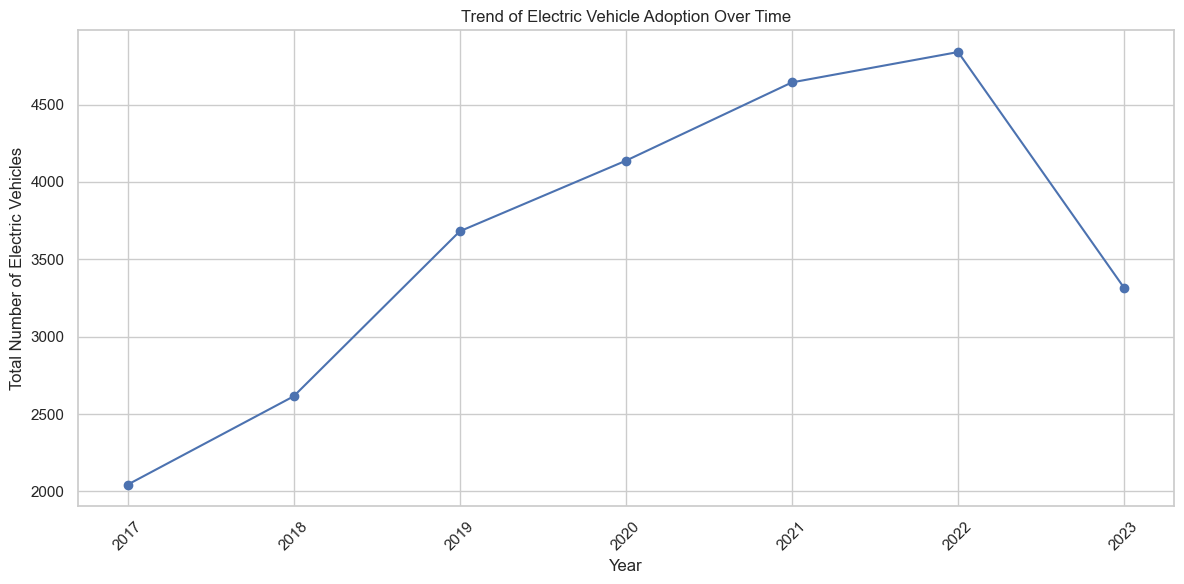

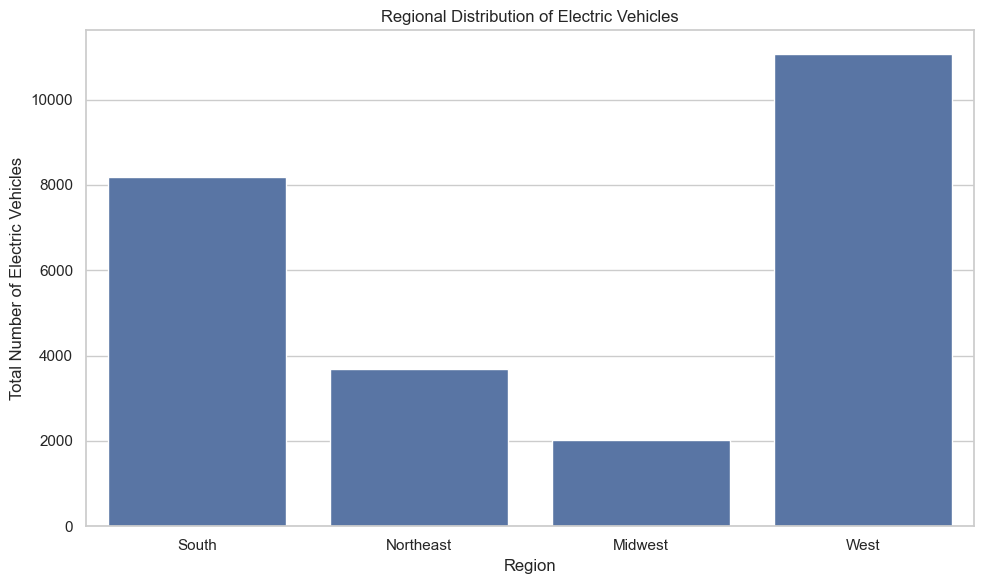

In [10]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Visualization 1: Trend of Electric Vehicle Adoption Over Time
plt.figure(figsize=(12, 6))
df.groupby('Year')['Electric Vehicle (EV) Total'].sum().plot(kind='line', marker='o')
plt.title('Trend of Electric Vehicle Adoption Over Time')
plt.xlabel('Year')
plt.ylabel('Total Number of Electric Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()

# Visualization 2: Regional Distribution of Electric Vehicles
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Electric Vehicle (EV) Total', data=df, estimator=sum, ci=None)
plt.title('Regional Distribution of Electric Vehicles')
plt.xlabel('Region')
plt.ylabel('Total Number of Electric Vehicles')
plt.tight_layout()

plt.show()

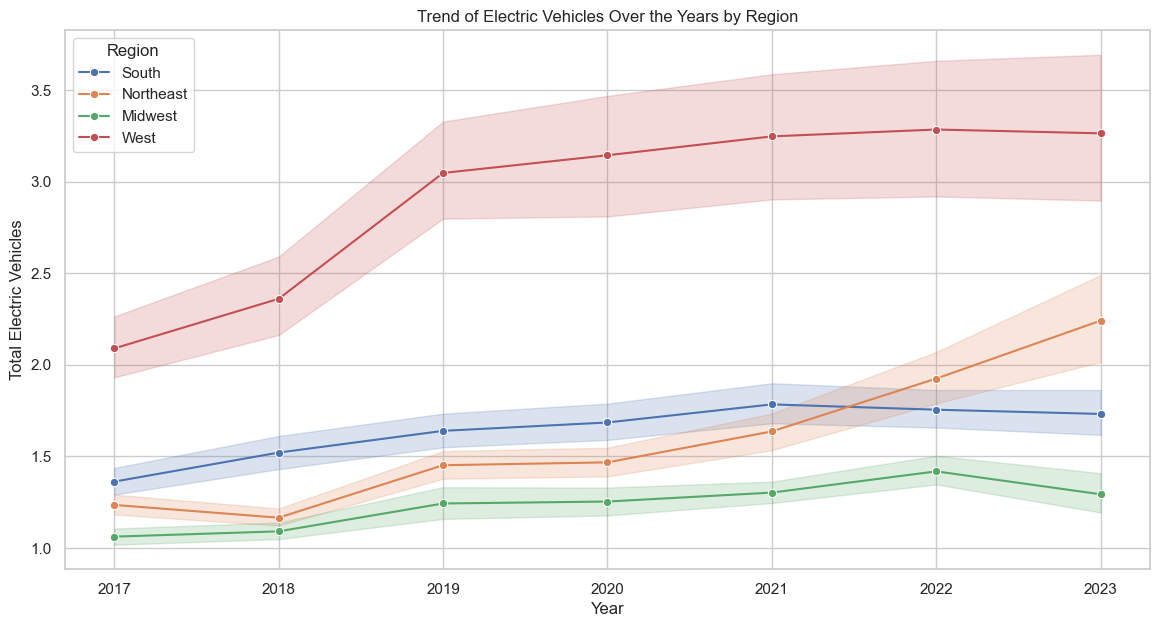

In [11]:
# Visualization: Trend of Electric Vehicles Over the Years by Region
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Year', y='Electric Vehicle (EV) Total', hue='Region', marker='o')
plt.title('Trend of Electric Vehicles Over the Years by Region')
plt.xlabel('Year')
plt.ylabel('Total Electric Vehicles')
plt.legend(title='Region', loc='upper left')
plt.grid(True)
plt.show()



# Checking the EV adoption in the top5 counties from each region

C:\Users\HP\AppData\Local\Temp\ipykernel_16976\2492423980.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_counties.index, y=top_5_counties.values, palette='viridis')


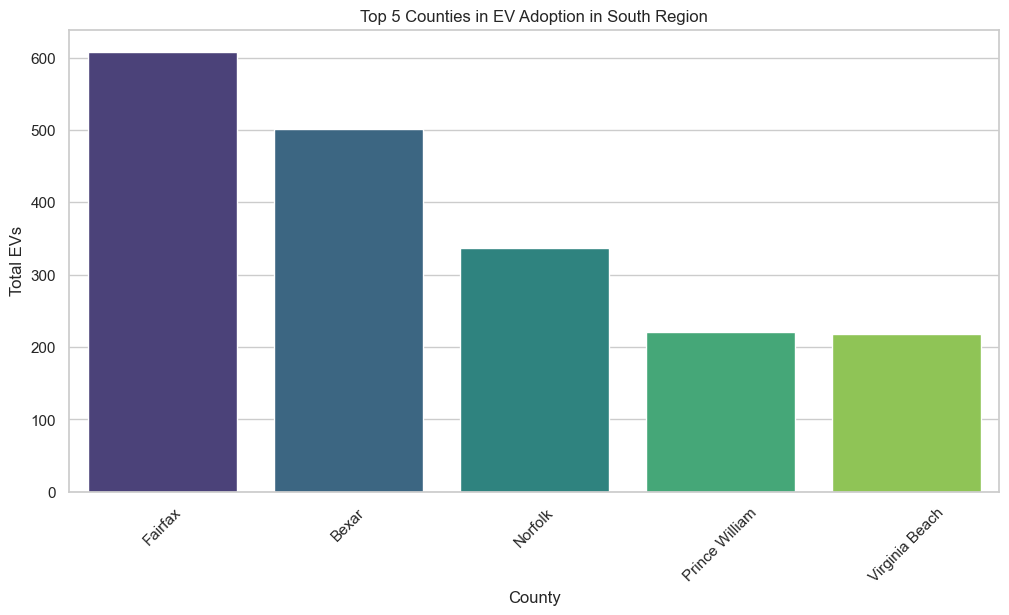

In [12]:
def plot_top_5_counties_for_region(dataframe, region_name):
    # Filter for the current region
    region_df = dataframe[dataframe['Region'] == region_name]

    # Group by 'County' and sum up the EV totals
    ev_totals = region_df.groupby('County')['Electric Vehicle (EV) Total'].sum()

    # Sort and get the top 5 counties
    top_5_counties = ev_totals.nlargest(5)

    # Create the bar chart
    sns.barplot(x=top_5_counties.index, y=top_5_counties.values, palette='viridis')
    plt.title(f'Top 5 Counties in EV Adoption in {region_name} Region')
    plt.xlabel('County')
    plt.ylabel('Total EVs')
    plt.xticks(rotation=45)

# Plot for a single region as an example
plt.figure(figsize=(12, 6))
plot_top_5_counties_for_region(df, 'South')
plt.show()




C:\Users\HP\AppData\Local\Temp\ipykernel_16976\2492423980.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_counties.index, y=top_5_counties.values, palette='viridis')


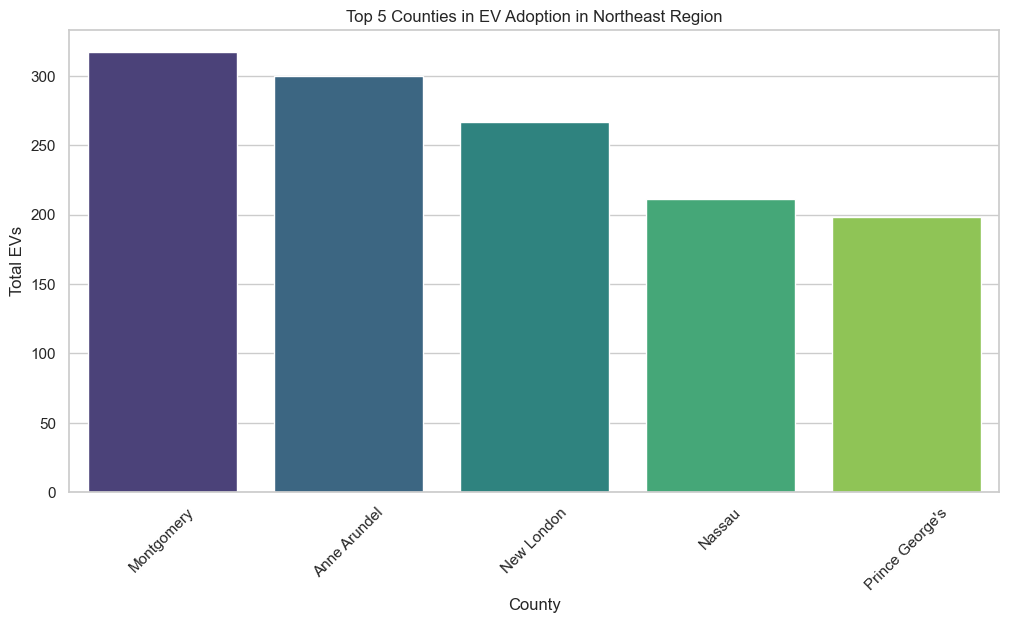

In [13]:
plt.figure(figsize=(12, 6))
plot_top_5_counties_for_region(df, 'Northeast')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16976\2492423980.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_counties.index, y=top_5_counties.values, palette='viridis')


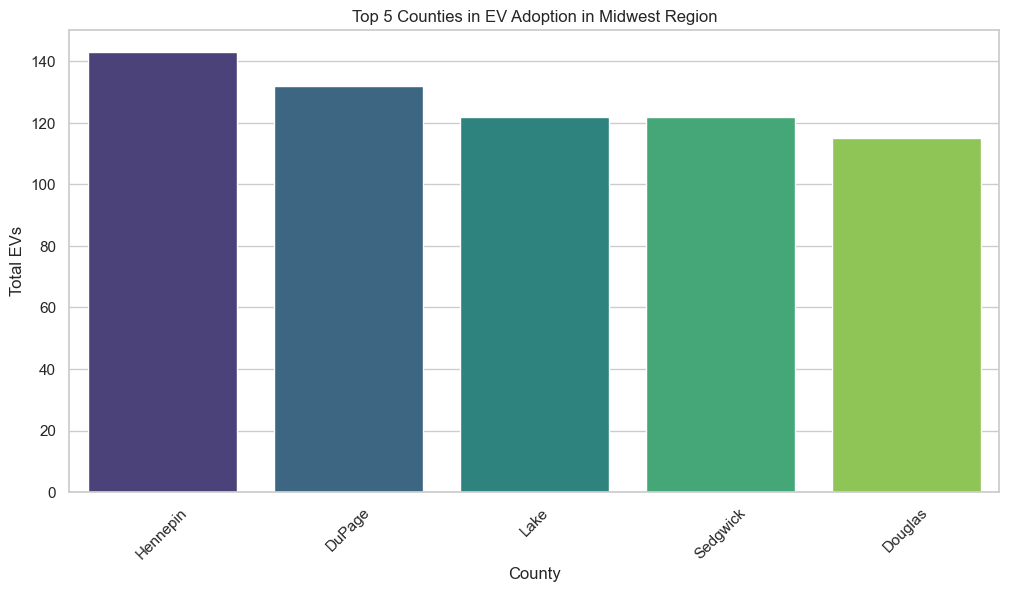

In [14]:
plt.figure(figsize=(12, 6))
plot_top_5_counties_for_region(df, 'Midwest')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16976\2492423980.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_counties.index, y=top_5_counties.values, palette='viridis')


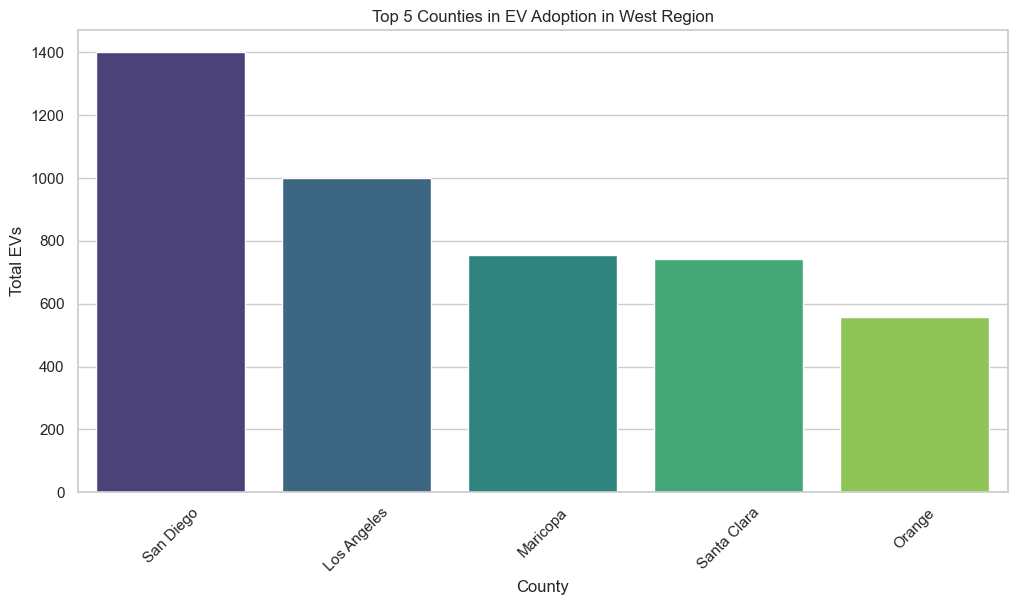

In [15]:
plt.figure(figsize=(12, 6))
plot_top_5_counties_for_region(df, 'West')
plt.show()

# BEV AND PHEV's

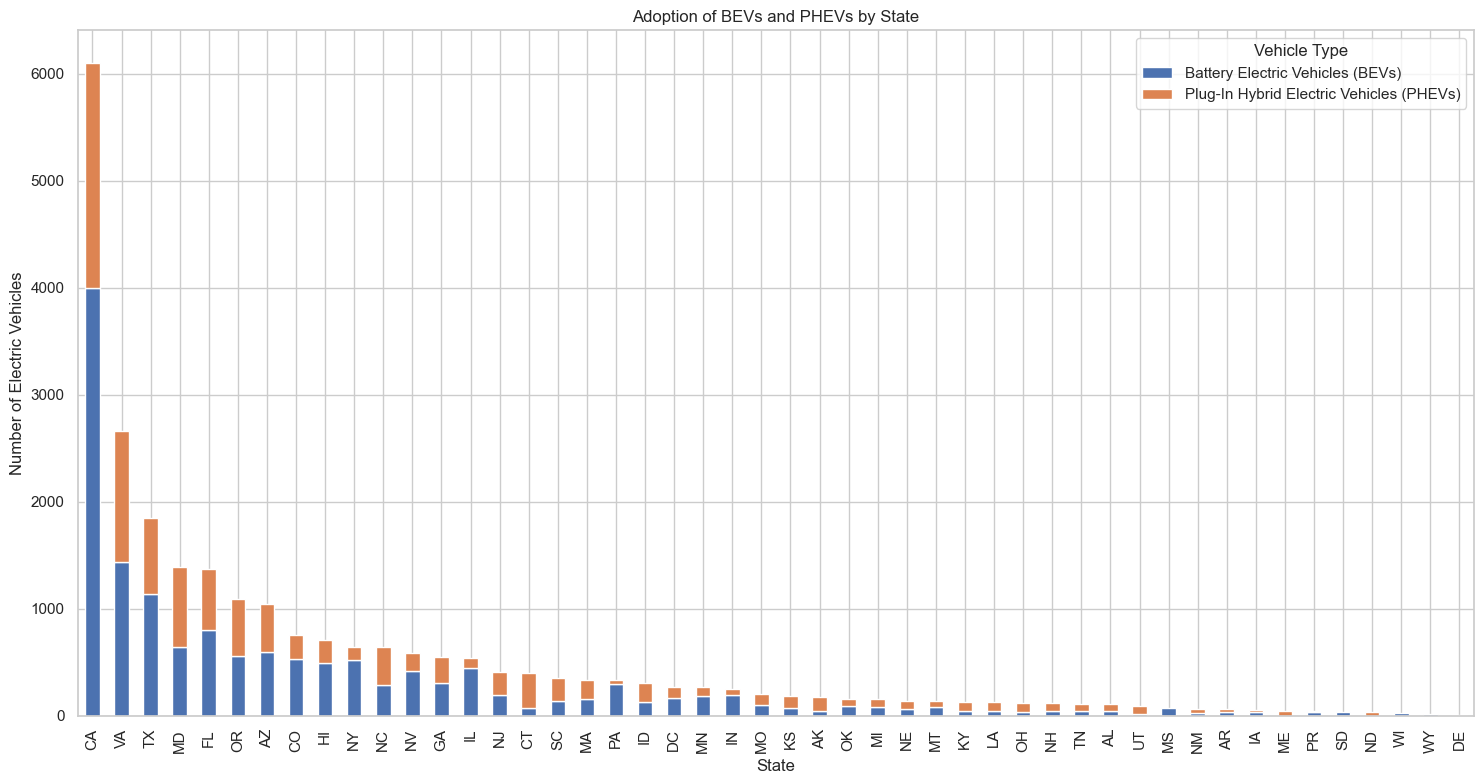

In [16]:
# Grouping the data by state and summing up the BEVs and PHEVs
state_ev_totals = df.groupby('State')[['Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)']].sum()

# Sorting the states based on the total number of EVs (BEVs + PHEVs)
state_ev_totals['Total EVs'] = state_ev_totals['Battery Electric Vehicles (BEVs)'] + state_ev_totals['Plug-In Hybrid Electric Vehicles (PHEVs)']
state_ev_totals_sorted = state_ev_totals.sort_values(by='Total EVs', ascending=False)

# Plotting a stacked bar chart
state_ev_totals_sorted[['Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)']].plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Adoption of BEVs and PHEVs by State')
plt.xlabel('State')
plt.ylabel('Number of Electric Vehicles')
plt.legend(title='Vehicle Type')
plt.tight_layout()

# Display the plot
plt.show()


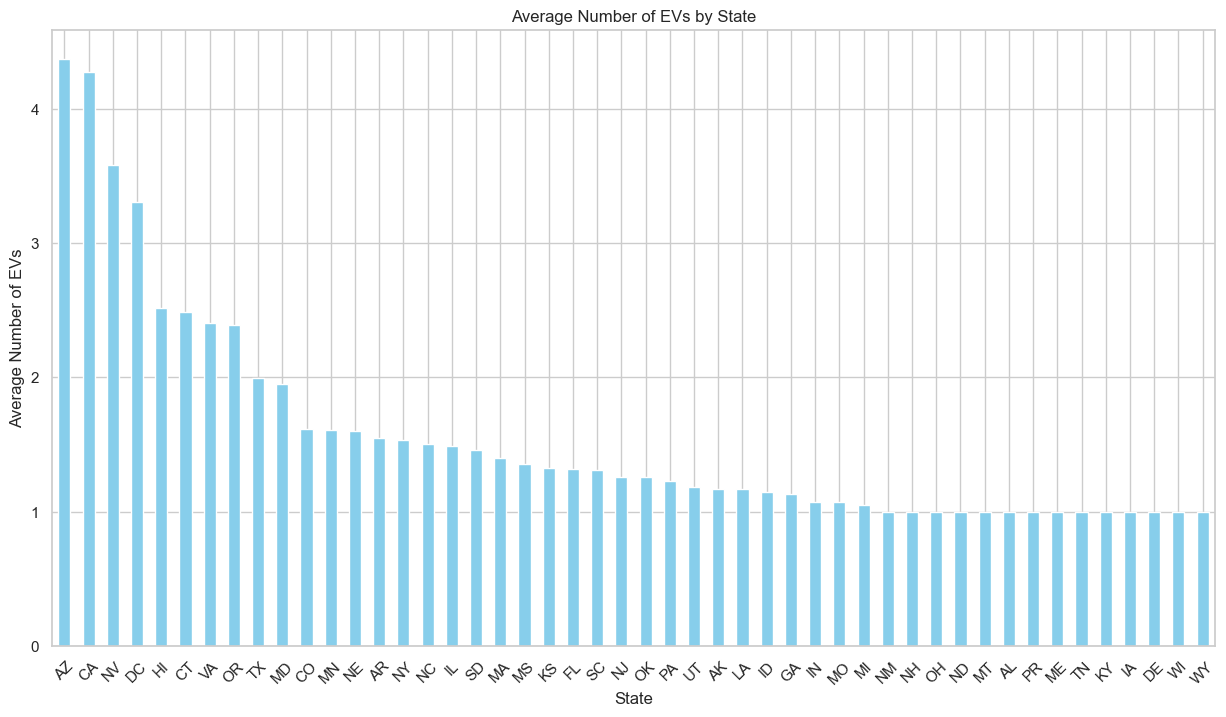

In [17]:
# Bar Chart of Average EVs by State
average_evs_by_state = df.groupby('State')['Electric Vehicle (EV) Total'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
average_evs_by_state.plot(kind='bar', color='skyblue')
plt.title('Average Number of EVs by State')
plt.xlabel('State')
plt.ylabel('Average Number of EVs')
plt.xticks(rotation=45)
plt.show()

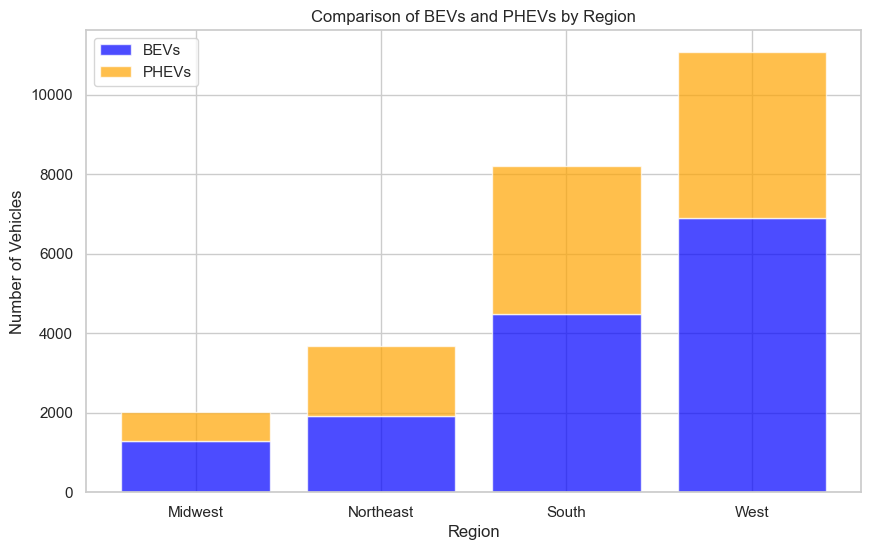

In [18]:
bevs_by_region = df.groupby('Region')['Battery Electric Vehicles (BEVs)'].sum()
phevs_by_region = df.groupby('Region')['Plug-In Hybrid Electric Vehicles (PHEVs)'].sum()

# Stacking BEVs and PHEVs
plt.figure(figsize=(10, 6))
plt.bar(bevs_by_region.index, bevs_by_region, label='BEVs', color='blue', alpha=0.7)
plt.bar(phevs_by_region.index, phevs_by_region, bottom=bevs_by_region, label='PHEVs', color='orange', alpha=0.7)
plt.title('Comparison of BEVs and PHEVs by Region')
plt.xlabel('Region')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()

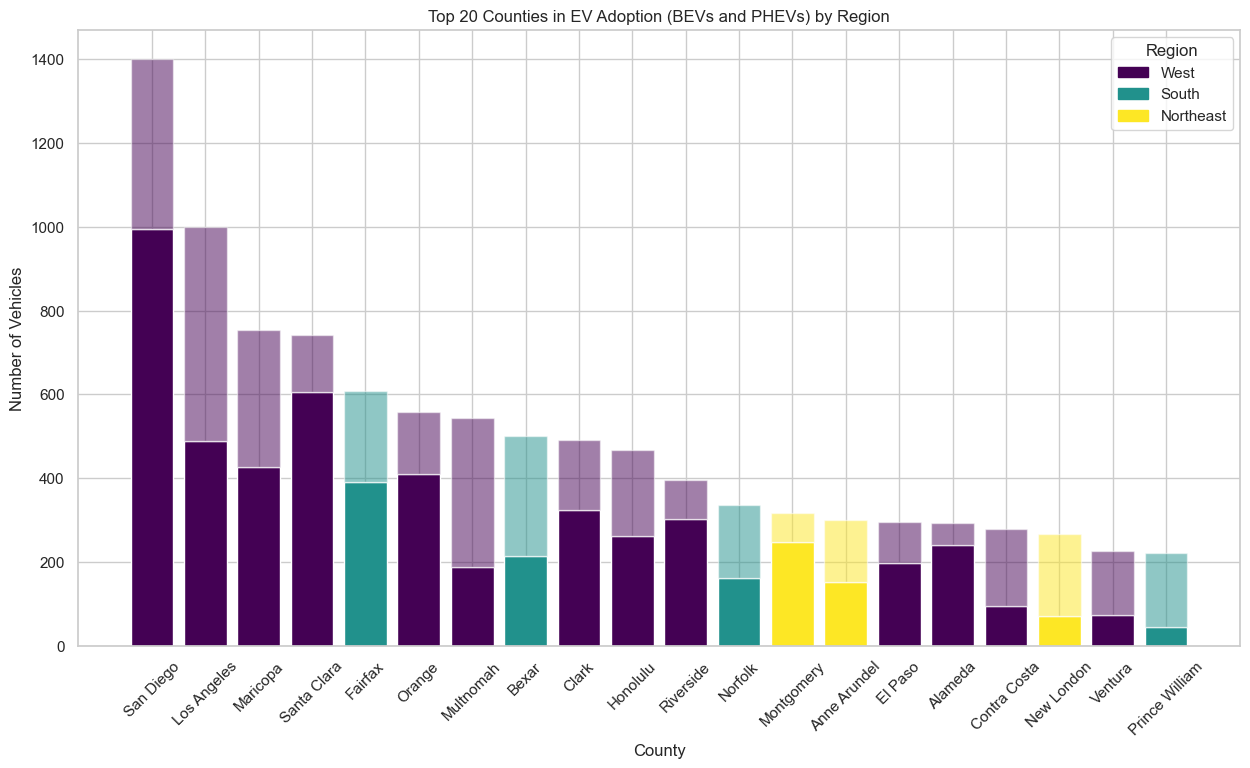

In [19]:
import numpy as np
# Assuming df1 is already loaded and preprocessed as before
county_region_grouped = df.groupby(['Region', 'County']).agg({
    'Battery Electric Vehicles (BEVs)': 'sum', 
    'Plug-In Hybrid Electric Vehicles (PHEVs)': 'sum'
}).reset_index()

# Adding a total EVs column for sorting
county_region_grouped['Total EVs'] = county_region_grouped['Battery Electric Vehicles (BEVs)'] + county_region_grouped['Plug-In Hybrid Electric Vehicles (PHEVs)']

# Sorting to get the top 20 counties overall based on total EVs
top_20_counties_overall = county_region_grouped.sort_values(by='Total EVs', ascending=False).head(20)

# Extracting the unique regions from the top 20 counties
regions = top_20_counties_overall['Region'].unique()

# Assigning different colors for each region using NumPy
colors = plt.cm.viridis(np.linspace(0, 1, len(regions)))
region_colors = {region: color for region, color in zip(regions, colors)}

# Creating the bar plot for the top 20 counties, colored by their region
plt.figure(figsize=(15, 8))
for _, row in top_20_counties_overall.iterrows():
    plt.bar(row['County'], row['Battery Electric Vehicles (BEVs)'], color=region_colors[row['Region']], edgecolor='white')
    plt.bar(row['County'], row['Plug-In Hybrid Electric Vehicles (PHEVs)'], bottom=row['Battery Electric Vehicles (BEVs)'], color=region_colors[row['Region']], alpha=0.5, edgecolor='white')

# Creating a custom legend
legend_patches = [mpatches.Patch(color=color, label=region) for region, color in region_colors.items()]
plt.legend(handles=legend_patches, title='Region')

plt.title('Top 20 Counties in EV Adoption (BEVs and PHEVs) by Region')
plt.xlabel('County')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()

# TESTING

### TESTING1

#### Is there a significant difference in the average number of EVs among different years (comparing 2017, 2019, and 2021)?

In [20]:
'''
Null Hypothesis (H0): There is no significant difference in the average number of EVs among the years 2017, 2019, and 2021. 
This implies that any observed differences are due to random chance.
Alternative Hypothesis (H1): There is a significant difference in the average number of EVs among these years, indicating that changes over  
the years are not just random variations.

'''
from scipy.stats import f_oneway
import pandas as pd

df_years = df[df['Year'].isin([2017, 2019, 2021])]

# Extract the EV totals for each of these years
data_2017 = df_years[df_years['Year'] == 2017]['Electric Vehicle (EV) Total']
data_2019 = df_years[df_years['Year'] == 2019]['Electric Vehicle (EV) Total']
data_2021 = df_years[df_years['Year'] == 2021]['Electric Vehicle (EV) Total']

# Perform ANOVA test
anova_result = f_oneway(data_2017, data_2019, data_2021)

# Output the result
print(anova_result)

F_onewayResult(statistic=25.423195756856018, pvalue=1.0250901376196195e-11)


### TESTING2

# SMART QUESTION: Is there a statistically significant association between geographic regions and the primary use categories of electric vehicles?

In [21]:
import pandas as pd
from scipy.stats import chi2_contingency

'''
Null Hypothesis (H0): There is no association between the region and the vehicle primary use category in terms of EV adoption.
This means any observed association is due to random chance.
Alternative Hypothesis (H1): There is an association between the region and the vehicle primary use  category in terms of EV adoption. 
This means the observed association is not due to random chance.

'''
contingency_table = pd.crosstab(df['Region'], df['Vehicle Primary Use'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("\nContingency Table:")
print(contingency_table)

Chi-square statistic: 19.06683791983831
p-value: 0.00026483531434350613

Contingency Table:
Vehicle Primary Use  Passenger  Truck
Region                               
Midwest                   1575     12
Northeast                 2302      0
South                     4921     12
West                      3724     15


### TESTING3

# SMART QUESTION: Is there a significant difference in the average number of electric vehicles (EVs) between the top 5 counties of the South region and the top 5 counties of the Northeast region in the United States?

In [22]:

from scipy.stats import ttest_ind
#H0 The mean number of EVs in the top 5 counties of the South region is equal to or greater than the mean number of EVs in the top 5 counties of the Northeast region. 
#H1: The mean number of EVs in the top 5 counties of the South region is less than the mean number of EVs in the top 5 counties of the Northeast region.

data_2023_northeast = df[(df['Year'] == 2023) & (df['Region'] == 'Northeast')]
county_ev_totals_northeast = data_2023_northeast.groupby('County')['Electric Vehicle (EV) Total'].sum()
top5_counties_northeast = county_ev_totals_northeast.sort_values(ascending=False).head(5)
data_2023_south = df[(df['Year'] == 2023) & (df['Region'] == 'South')]
county_ev_totals = data_2023_south.groupby('County')['Electric Vehicle (EV) Total'].sum()

top5_counties = county_ev_totals.sort_values(ascending=False).head(5)


mean_south = top5_counties.mean()
mean_northeast = top5_counties_northeast.mean()

# Perform a t-test
# Since we are doing a one-tailed test, we need to divide the p-value by 2
t_stat, p_value = ttest_ind(top5_counties, top5_counties_northeast, equal_var=False)
p_value_one_tailed = p_value / 2

mean_south, mean_northeast, t_stat, p_value_one_tailed 

print("t-stat:",t_stat)
print("p_value",p_value_one_tailed)


t-stat: 0.07371697182914644
p_value 0.4715510434929737


### The p-value is much higher than the commonly used significance level of 0.05 so we failed to reject null hypothesis so we  conclude that the mean number of EVs in the top 5 counties of the South region is less than that in the top 5 counties of the Northeast region
### We have seen that the trend of EV adoption in each region in that we have seen Northeast have higher adoption than  south from 2022 to 2023 we are using the above test to check northeast adoption or increase of ev not due to top5 counties but rather average of all counties from the t-test the top5 south region having highest EV adoption but overall it decreased

# MODELLING

# SMART QUESTION: Is there a relationship between the year and total vehicle count in predicting regional EV adoption?

In [23]:
import statsmodels.api as sm

# Preparing the data for linear regression
# 'Year' and 'Total Vehicles' will be our independent variables (predictors)
# 'Electric Vehicle (EV) Total' is the dependent variable (target)

X = df[['Year', 'Total Vehicles']]  # Independent variables
y = df['Electric Vehicle (EV) Total']  # Dependent variable

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Building the linear regression model
model = sm.OLS(y, X).fit()

# Getting the summary of the regression
model_summary = model.summary()

print(model_summary)

                                 OLS Regression Results                                
Dep. Variable:     Electric Vehicle (EV) Total   R-squared:                       0.591
Model:                                     OLS   Adj. R-squared:                  0.591
Method:                          Least Squares   F-statistic:                     9158.
Date:                         Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                                 17:37:24   Log-Likelihood:                -23297.
No. Observations:                        12688   AIC:                         4.660e+04
Df Residuals:                            12685   BIC:                         4.662e+04
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [24]:
'''
Task: Predict whether a county has a high or low adoption of electric vehicles based on the provided features.
Target Variable: Create a binary target variable (e.g., "High EV Adoption" vs. "Low EV Adoption") based on a threshold of Percent Electric Vehicles.
Logistic Regression: Use logistic regression to model the likelihood of high EV adoption based on the other features.

'''
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the threshold for high vs. low EV adoption (you can adjust this threshold)
threshold = 5.0  # For example, counties with >5% adoption are considered "high" adoption

# Create a binary target variable based on the threshold
df['HighEVAdoption'] = (df['Percent Electric Vehicles'] > threshold).astype(int)

# Define the predictors (features)
X = df[['Year', 'Electric Vehicle (EV) Total', 'State', 'Region']]

# Define the target variable
y = df['HighEVAdoption']

# Perform one-hot encoding for the categorical columns
X = pd.get_dummies(X, columns=['State', 'Region'], drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8175728920409772
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1960
           1       0.70      0.34      0.46       578

    accuracy                           0.82      2538
   macro avg       0.77      0.65      0.68      2538
weighted avg       0.80      0.82      0.79      2538

